# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | juneau
Processing Record 5 of Set 1 | bud
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ko samui
Processing Record 9 of Set 1 | letpadan
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | safut
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | asyut
Processing Record 21 of Set 1 | mahebourg
Processing Re

City not found. Skipping...
Processing Record 37 of Set 4 | bargal
City not found. Skipping...
Processing Record 38 of Set 4 | guhagar
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | petit goave
Processing Record 41 of Set 4 | thinadhoo
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | tazovskiy
Processing Record 44 of Set 4 | umm kaddadah
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | presidencia roque saenz pena
Processing Record 47 of Set 4 | mweka
Processing Record 48 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 49 of Set 4 | palmer
Processing Record 0 of Set 5 | korla
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | witu
Processing Record 3 of Set 5 | correntina
Processing Record 4 of Set 5 | whitehorse
Processing Record 5 of Set 5 | shieli
Processing Record 6 of Set 5 | petropavlovka
Processing Record 7 of Set 5 | noumea
Processing Record 8 of Set 5 | 

Processing Record 22 of Set 8 | malartic
Processing Record 23 of Set 8 | neuquen
Processing Record 24 of Set 8 | canchungo
Processing Record 25 of Set 8 | paamiut
Processing Record 26 of Set 8 | camacha
Processing Record 27 of Set 8 | manzil salim
Processing Record 28 of Set 8 | brigantine
Processing Record 29 of Set 8 | high prairie
Processing Record 30 of Set 8 | palauig
Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | el dorado
Processing Record 33 of Set 8 | wilmington
Processing Record 34 of Set 8 | pangnirtung
Processing Record 35 of Set 8 | jurmala
Processing Record 36 of Set 8 | turukhansk
Processing Record 37 of Set 8 | anori
Processing Record 38 of Set 8 | landeck
Processing Record 39 of Set 8 | warqla
City not found. Skipping...
Processing Record 40 of Set 8 | traiguen
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | sayyan
Processing Record 43 of Set 8 | mbarara
Processing Record 44 of Set 8 | tautira
Processing Record 45 o

Processing Record 14 of Set 12 | arnold
Processing Record 15 of Set 12 | mergui
City not found. Skipping...
Processing Record 16 of Set 12 | maragogi
Processing Record 17 of Set 12 | luena
Processing Record 18 of Set 12 | poronaysk
Processing Record 19 of Set 12 | chagda
City not found. Skipping...
Processing Record 20 of Set 12 | sola
Processing Record 21 of Set 12 | pecangakan
Processing Record 22 of Set 12 | offa
Processing Record 23 of Set 12 | longlac
City not found. Skipping...
Processing Record 24 of Set 12 | dighwara
Processing Record 25 of Set 12 | pascagoula
Processing Record 26 of Set 12 | talcahuano
Processing Record 27 of Set 12 | grand bank
Processing Record 28 of Set 12 | jalu
Processing Record 29 of Set 12 | callaway
Processing Record 30 of Set 12 | chadiza
Processing Record 31 of Set 12 | camana
Processing Record 32 of Set 12 | maldonado
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | puksoozero
Processing Record 35 of Set 12 | santiago del e

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avera,33.1940,-82.5271,15.86,84,100,2.57,US,1675300695
1,mataura,-46.1927,168.8643,26.46,52,100,0.81,NZ,1675300697
2,busselton,-33.6500,115.3333,19.56,51,92,7.62,AU,1675300704
3,juneau,58.3019,-134.4197,0.68,94,100,1.54,US,1675300688
4,bud,39.4470,-86.1758,-1.99,61,100,1.04,US,1675300706


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avera,33.1940,-82.5271,15.86,84,100,2.57,US,1675300695
1,mataura,-46.1927,168.8643,26.46,52,100,0.81,NZ,1675300697
2,busselton,-33.6500,115.3333,19.56,51,92,7.62,AU,1675300704
3,juneau,58.3019,-134.4197,0.68,94,100,1.54,US,1675300688
4,bud,39.4470,-86.1758,-1.99,61,100,1.04,US,1675300706


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

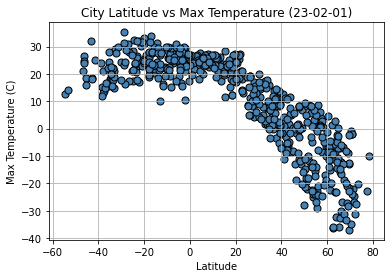

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

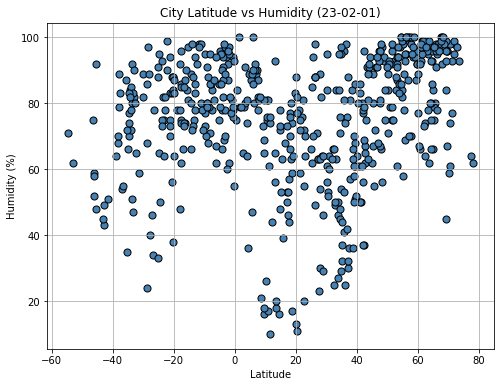

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

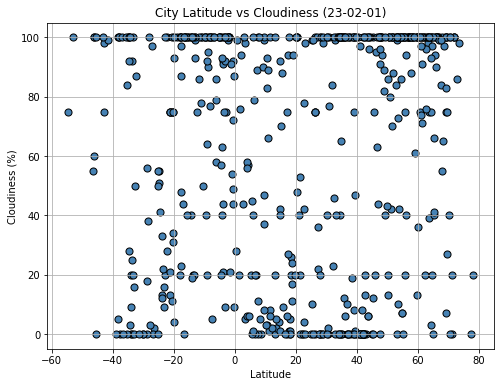

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

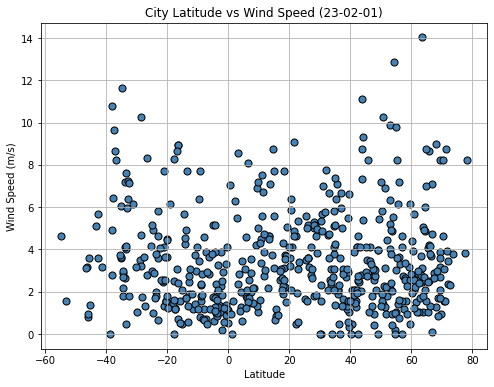

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=50, color="steelblue", edgecolor="black")

# Incorporate the other graph properties
timestamp = city_data_df.iloc[0,8]
date = datetime.fromtimestamp(timestamp).strftime("%y-%m-%d")
plt.rcParams["figure.figsize"] = (8,6)
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regressions(x_values, y_values, y_label, eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (eq_x,eq_y), fontsize=16, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"the r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avera,33.1940,-82.5271,15.86,84,100,2.57,US,1675300695
3,juneau,58.3019,-134.4197,0.68,94,100,1.54,US,1675300688
4,bud,39.4470,-86.1758,-1.99,61,100,1.04,US,1675300706
6,ko samui,9.5357,99.9357,26.52,69,99,1.02,TH,1675300711
7,letpadan,17.7833,95.7500,20.69,57,1,1.87,MM,1675300712


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,26.46,52,100,0.81,NZ,1675300697
2,busselton,-33.6500,115.3333,19.56,51,92,7.62,AU,1675300704
5,ushuaia,-54.8000,-68.3000,12.81,71,75,4.63,AR,1675300709
10,hualmay,-11.0964,-77.6139,22.40,80,100,3.73,PE,1675300435
15,kaitangata,-46.2817,169.8464,24.68,59,60,3.18,NZ,1675300721


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.8684776653203283


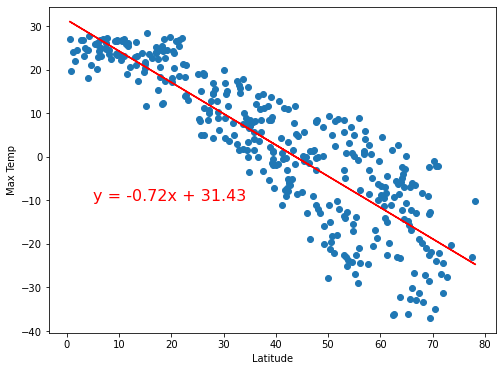

In [15]:
# Linear regression on Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", 5,-10)

the r-value is: 0.27074725949213957


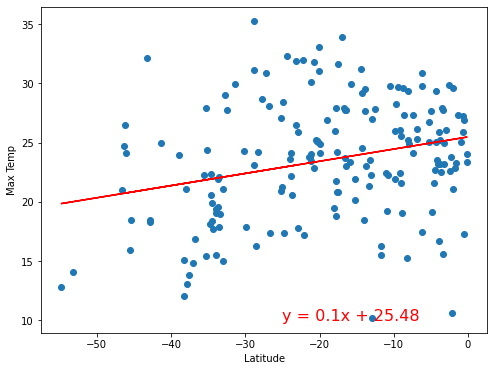

In [16]:
# Linear regression on Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", -25,10)

**Discussion about the linear relationship:** The northern hemisphere has a very strong negative correlation between latitude and max temperature, while the southern hemisphere has a moderate positive correlation between latitude and max temperature. 

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.4201904753397064


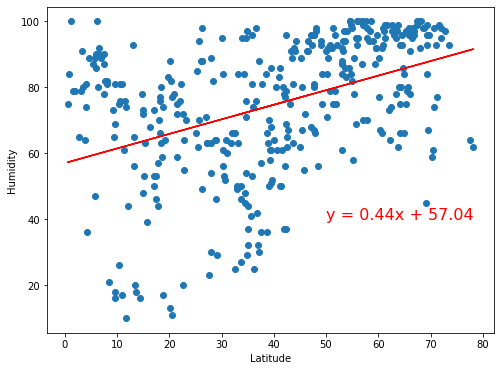

In [17]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", 50,40)

the r-value is: 0.399619329545036


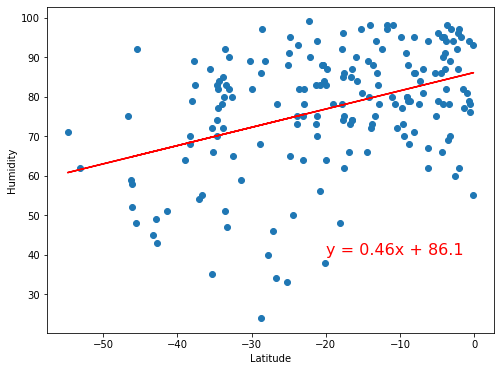

In [18]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", -20, 40)

**Discussion about the linear relationship:** The Northern hemisphere has a moderate positive correlation between latitude and humidit and the Southern hemisphere has a weak positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.3248444054856991


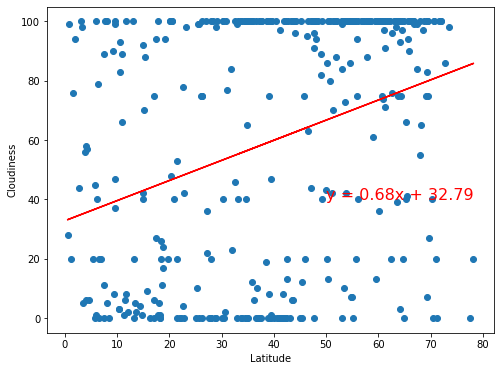

In [19]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", 50,40)

the r-value is: 0.22947026542557145


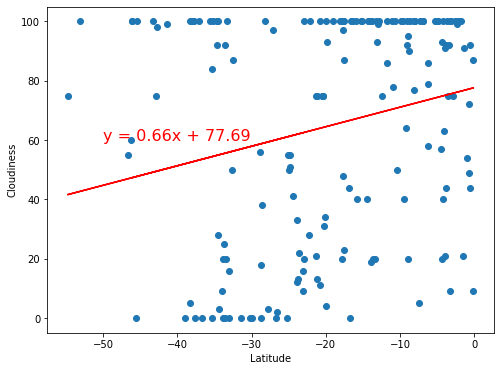

In [20]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", -50,60)

**Discussion about the linear relationship:** The Nothern hemisphere has a weak positive correlation between latitude and cloudiness, and the southern hemisphere has a weak positive correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.0025576041720895963


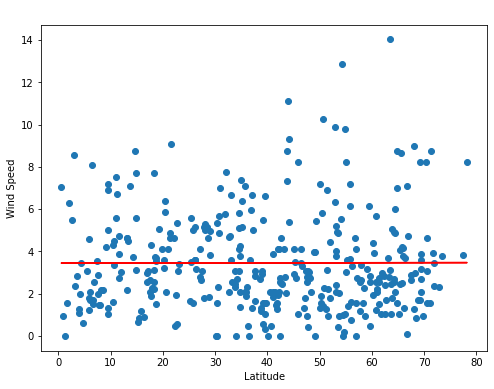

In [21]:
# Northern Hemisphere
regressions(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", 10,15)

the r-value is: -0.34284324813769856


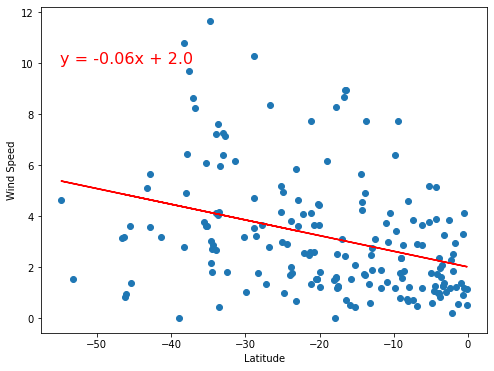

In [22]:
# Southern Hemisphere
regressions(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", -55,10)

**Discussion about the linear relationship:** The northern hemisphere has a very weak positive correlation between latitude and wind speed and the southern hemisphere has a weak negative correlation between latitude and wind speed.